In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('datasets/cov-sym.csv')
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
df.shape

(5434, 21)

Columns - labels (1: yes, 0: no)
1. bp = breathing problem
2. fever = fever
3. dc = dry cough
4. st = sore throat
5. running nose = rn
6. asthma = asthma
7. cld = chronic lung disease
8. headache = headache
9. hd = heart disease
10. diabetes = diabetes
11. ht = hypertension
12. fatigue = fatigue
13. gst = gastrointestinal
14. travel = abroad travel
15. contact = contact with covid patient
16. gather_exposed = attended a large gathering
17. public_exposed = visited public exposed places
18. family_exposed = family working in public exposed places
19. mask = wearing mask
20. sanitization = sanitization from market
21. cov-19 = covid-19

In [4]:
old_cols = df.columns
new_cols = ['bp', 'fever', 'dc', 'st', 'rn', 'asthma', 'cld', 
        'headache', 'hd', 'diabetes', 'ht', 'fatigue', 'gst', 
        'travel', 'contact', 'gather_exposed', 'public_exposed', 
        'family_exposed', 'mask', 'sanitization', 'cov-19']

col_dict = {}
for i in range(len(old_cols)):
    col_dict[old_cols[i]] = new_cols[i]

df = df.rename(columns=col_dict)

In [5]:
def convert_label(statement):
    if statement.strip().lower() == 'yes':
        return 1
    else:
        return 0

In [6]:
df = df.applymap(lambda x: convert_label(x))

In [7]:
df.isnull().sum()

bp                0
fever             0
dc                0
st                0
rn                0
asthma            0
cld               0
headache          0
hd                0
diabetes          0
ht                0
fatigue           0
gst               0
travel            0
contact           0
gather_exposed    0
public_exposed    0
family_exposed    0
mask              0
sanitization      0
cov-19            0
dtype: int64

In [8]:
df[df.columns[:-1]] = df[df.columns[:-1]].astype('O')

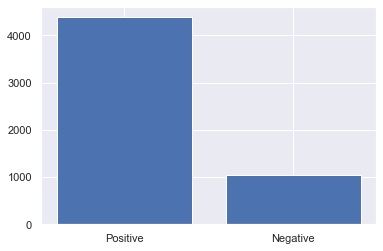

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set()

class_count = list(df['cov-19'].value_counts())
f, ax = plt.subplots()
ax.bar(["Positive", "Negative"], class_count)
plt.show()

In [10]:
df.bp.value_counts()

1    3620
0    1814
Name: bp, dtype: int64

In [11]:
# Remove "contact" column because 
# I believe many people are not sure if they did contact one
X = df[[col for col in df.columns[:-1] if col != 'contact']]
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from dtc import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.print_tree()

Is st == 1?
|=== TRUE ===|
    Is dc == 0?
    |=== TRUE ===|
        Is bp == 1?
        |=== TRUE ===|
            Is gather_exposed == 1?
            |=== TRUE ===|
            {1: 1.0}
            |=== FALSE ===|
                Is fever == 1?
                |=== TRUE ===|
                    Is fatigue == 1?
                    |=== TRUE ===|
                        Is asthma == 1?
                        |=== TRUE ===|
                            Is hd == 1?
                            |=== TRUE ===|
                                Is ht == 1?
                                |=== TRUE ===|
                                {0: 0.6666666666666666, 1: 0.3333333333333333}
                                |=== FALSE ===|
                                {1: 1.0}
                            |=== FALSE ===|
                                Is family_exposed == 1?
                                |=== TRUE ===|
                                {1: 1.0}
                                |=== FAL

In [13]:
print("Tree depth:", dtc.depth)

Tree depth: 6


In [14]:
print(classification_report(np.array(y_test), dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       203
           1       0.99      0.99      0.99       884

    accuracy                           0.98      1087
   macro avg       0.97      0.98      0.97      1087
weighted avg       0.98      0.98      0.98      1087



In [16]:
from sklearn.tree import DecisionTreeClassifier

sklearn_dtc = DecisionTreeClassifier()
sklearn_dtc.fit(X_train, y_train)
print(classification_report(np.array(y_test), sklearn_dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       203
           1       0.99      0.99      0.99       884

    accuracy                           0.98      1087
   macro avg       0.97      0.98      0.97      1087
weighted avg       0.98      0.98      0.98      1087




Running PCA ...
Explained variance: 0.6061
Individual variance contributions:
0.11167248117307622
0.08590768162939401
0.076639604266699
0.07527599655313837
0.06980037042585373
0.06488808982063383
0.0634559218151486
0.05846140150347907


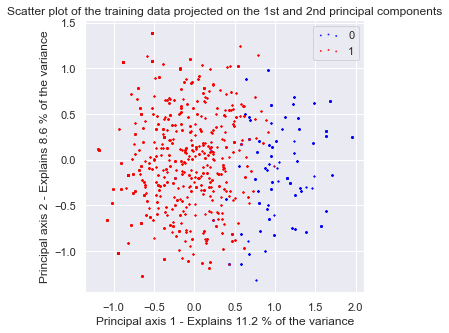

In [17]:
from sklearn.decomposition import PCA

n_comp = 8
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

colors = ['blue', 'red']
plt.figure(1, figsize=(5, 5))

for color, i, target_name in zip(colors, [0, 1], np.unique(y)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=3,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.show()